In [1]:
#! pip install nltk

In [2]:
#! pip install emot

In [3]:
#! pip install wordcloud

In [4]:
#! pip install ko-ww-stopwords

In [40]:
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize

import string
import re

#Korean stopwords
from ko_ww_stopwords.stop_words import ko_ww_stop_words 
from ko_ww_stopwords.tools import is_stop_word, strip_outer_punct

from wordcloud import STOPWORDS, WordCloud
from emot.emo_unicode import UNICODE_EMOJI
import pandas as pd

In [12]:
len(list(ko_ww_stop_words))

142

In [31]:

lemmatizer = WordNetLemmatizer()
kor_stop_words = list(ko_ww_stop_words)
emoji = list(UNICODE_EMOJI.keys())

def clean_text(text):
    #changing to lowercase
    text = text.lower()
    # removing @ and links
#     text = re.sub(r'@[A-Za-z0-9]+', '', text)
    text = re.sub(r'#', '', text)
    text = re.sub(r'RT[\s]+', '', text)
    text = re.sub(r'https?:\/\/\S+', '', text)
#     text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
#     # removing repeating characters
    text = re.sub(r'\@\w+|\#\w+|\d+','',text)
    #removing punctuatuon and numbers
    punct = str.maketrans('', '', string.punctuation+string.digits)
    #tokenizing words and removing stop words from text
    tokens = word_tokenize(text)
    filtered_words = [w for w in tokens if w not in kor_stop_words]
    filtered_words = [w for w in filtered_words if w not in emoji]
    #lemmetizing words
    lemmatizer = WordNetLemmatizer()
    lemma_words = [lemmatizer.lemmatize(w) for w in filtered_words]
    text = " ".join(lemma_words)
    return text


In [64]:
df = pd.read_csv("./bugs_lyrics/마마무(Mamamoo)_80177857.csv")
df['Lyric'] = df['Lyric'].apply(clean_text)

stop2 = kor_stop_words
manual_sw_list = ['내', '너의', '난', '날', '내가', '너','나', '널', '네', '니가', '네가', '널', '너를', '넌', '내게']
#넌 난 어쩌구저쩌구 하는 것 부터가 사랑 노래라는 것을 시사하지 않나..

stop2.extend(manual_sw_list)


df['Lyric'] = df['Lyric'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop2)]))

#전체 가사 합치기 -> 전반적인 정서는 무엇인가?
new = " ".join(cat for cat in df.Lyric)
new


"[ knock knock 낯선 등장이 평소답지 않은 눈빛이 뭔가 느낌이 수상해 지금은 시분전 점점 분위기에 취하고 눈빛은 서로를 비추고 흐르는 침묵도 끈적해 터질 것만 같은 사이 너와나 입을 맞춰 i feel good 너에게 나를 맡겨 i feel good 이건 위험해 위험해 위험해 선을 넘을 것만 같아 너와나 그린 i feel good 오렌지 빛깔 그림 i feel good 조금은 위험해 위험해 위험해도 멈출 수가 없어 i feel good knock knock 그때 예상했었지 여잔 촉이 정말 빠르지 이미 물은 엎질러졌어 우린 몰래 새벽을 맞네 at that time knock knock 지난 여름부터 밤낮 사춘기 소녀처럼 꿈꾸게 만들었어 로맨스 오늘만 기다렸어 oh yes oh 핸드폰은 off 치명적인 호흡 비밀스런 파티 깔아 레드 카펫 공간에 와준 환영해 knock knock 두 손을 머리위로 clap your hand 너와나 입을 맞춰 i feel good 너에게 나를 맡겨 i feel good 이건 위험해 위험해 위험해 선을 넘을 것만 같아 너와나 그린 i feel good 오렌지 빛깔 그림 i feel good 조금은 위험해 위험해 위험해도 멈출 수가 없어 i feel good 나를 깨우는 속삭임 ( i feel good ) 손짓 몸짓 ( i feel good ) 너와 단둘이 맞은 아침이 ( i feel good ) i feel good good good good 헝클어진 머리 헐크 같은 바디 라인 보고 싶어 백허그까지 uh 고개를 끄덕 끄덕 숨 쉴 수가 없네 i ca n't control my self 준비했어 위해 ( mamamoo is coming back for you ) knock knock knock knock 두 손을 머리위로 clap your hand 너와나 입을 맞춰 i feel good 너에게 나를 맡겨 i feel good 이건 위험해 위험해 위험해 선을 넘을 것만 같아 너와나 그린 i feel good 오렌지 빛깔 그림 i f

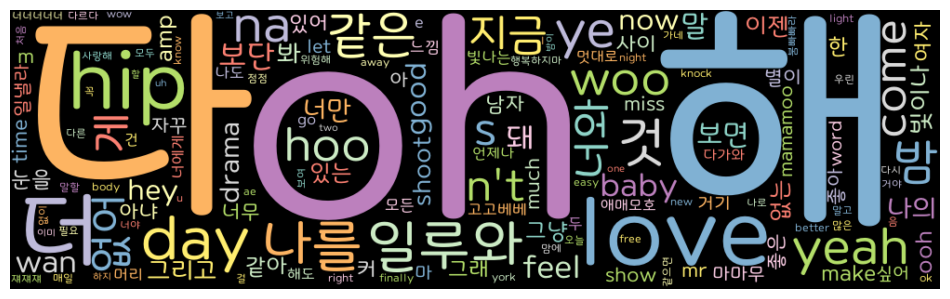

In [65]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# mask = np.array(Image.open("./05.png"))
# 밑에 mask = mask 넣기, background_color="rgba(255, 255, 255, 0)", mode="RGBA"


word_cloud = WordCloud(font_path='Binggrae', width = 1000, height = 300, 
colormap='Set3', max_words=150, collocations = False).generate(new)


plt.figure(figsize = (12,4))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

